#Grasp and Lift Plots

Some scripts to load data and draw some plots for the EEG grasp and lift [Kaggle Competition](https://www.kaggle.com/c/grasp-and-lift-eeg-detection). 

Some code is based on this [Kaggle script](https://www.kaggle.com/stefaneng/grasp-and-lift-eeg-detection/simple-python-pandas-plots/code) by Stefan Eng, and all code is released under the [Apache 2.0](http://www.apache.org/licenses/LICENSE-2.0) open source license.

(119496, 32)


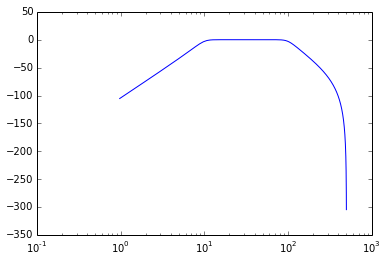

In [79]:
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, welch, freqz
%matplotlib inline


data_path = "../train/"
image_path = "../Images/"
s1s1_events_f = data_path + "subj1_series1_events.csv"
s1s1_data_f = data_path + "subj1_series1_data.csv"

outfile = data_path + "s1s1_events.png"

s1s1_events = pd.read_csv(s1s1_events_f).drop('id',axis=1)
s1s1_data = pd.read_csv(s1s1_data_f).drop('id',axis=1)
s1s1 = pd.concat([s1s1_events,s1s1_data],axis = 1)
s1s1["time"] = np.arange(0,len(s1s1)/500,1/500)

sample_s1s1 = s1s1[:4000]

events = s1s1_events.columns
channels = s1s1_data.columns

event_colours = {'HandStart':"green", 'FirstDigitTouch':"red", 'BothStartLoadPhase':"indigo", 
                 'LiftOff':"blue", 'Replace':"darkseagreen", 'BothReleased':"greenyellow"}

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a)
    w = fs*w/3.14 
    pl.semilogx(w, 20 * np.log10(abs(h)))
    print(data.shape)
    y = lfilter(b, a, data,axis=0)
    return y

s1s1f_data = pd.DataFrame(butter_bandpass_filter(s1s1_data,5,50,500),columns=channels)
s1s1f = pd.concat([s1s1_events,s1s1f_data],axis = 1)
s1s1f["time"] = np.arange(0,len(s1s1)/500,1/500)

In [17]:

def plotChans(samples,ylim=[-500,2200]):

    fig, axes = pl.subplots(nrows = len(channels[:4])//2 + 1,ncols=2)
    for i, ch in enumerate(channels[:4]):
        samples.plot(x="time",y=ch,ax=axes[i//2 + 1][i%2],legend=False,figsize=(20,24))
        axes[i//2 + 1][i%2].set_xlabel("")
        axes[i//2 + 1][i%2].set_yticks([0,1000,2200])
        axes[i//2 + 1][i%2].set_ylim(ylim)

    for i, ev in enumerate(events):
        times = samples["time"][samples[ev]==1]
        ys = np.full(len(times),i+1)
        for j in range(2):
            axes[0][j].set_ylim(0,7)
            axes[0][j].plot(times,ys,color=event_colours[ev],linewidth=3,label=ev)



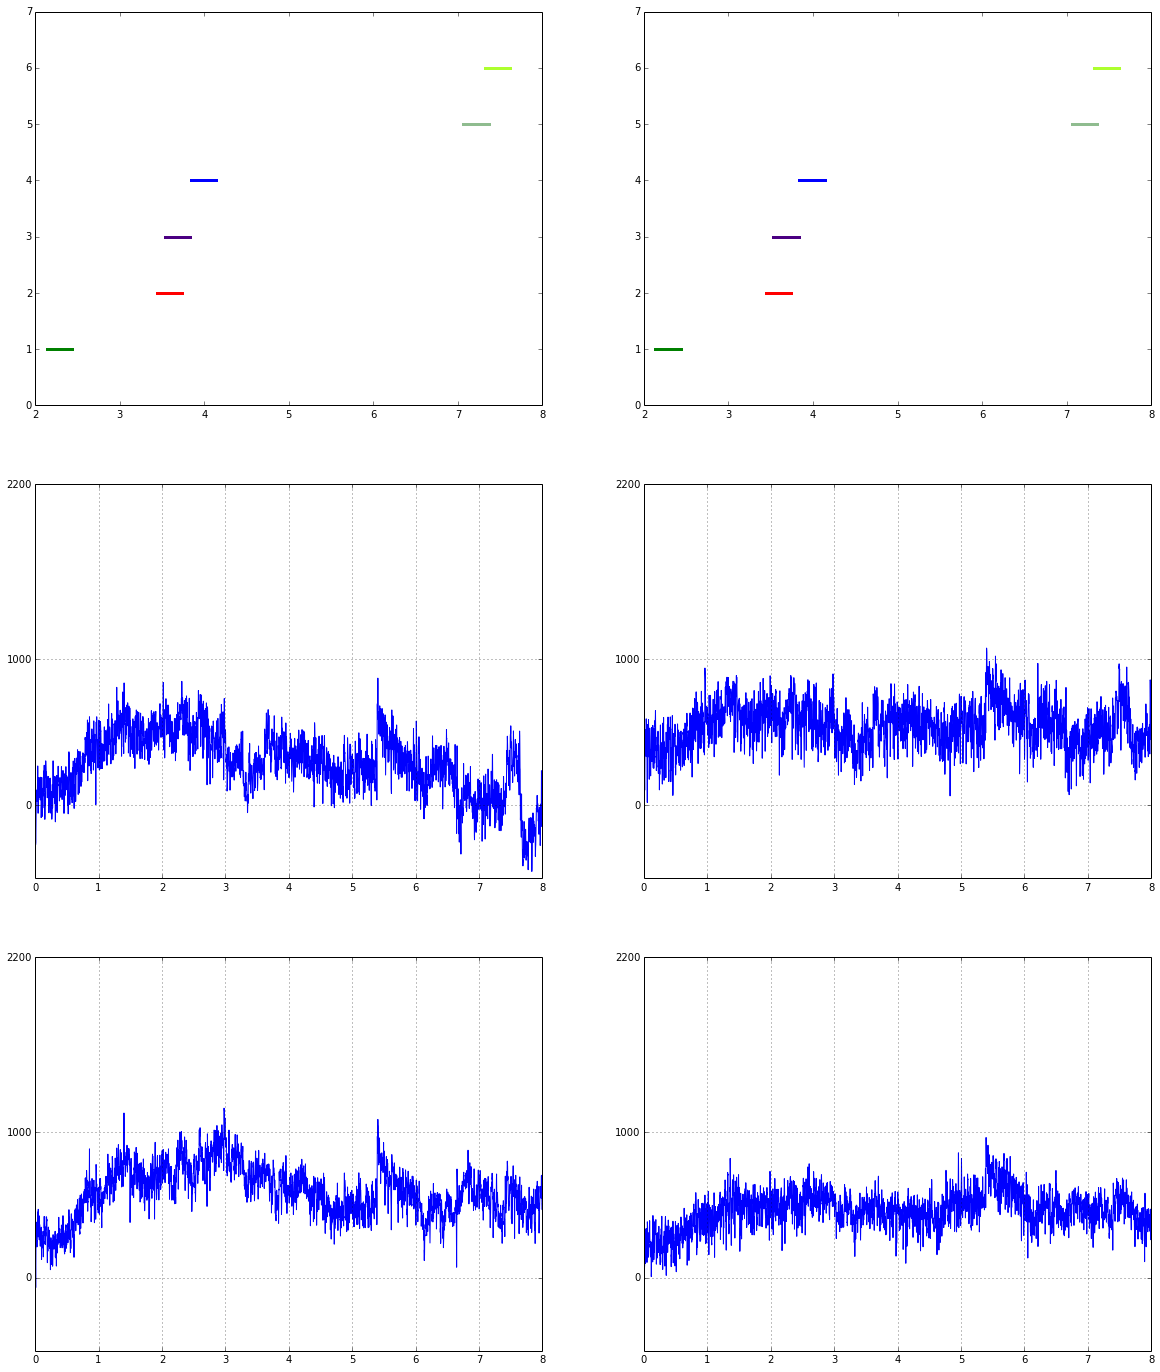

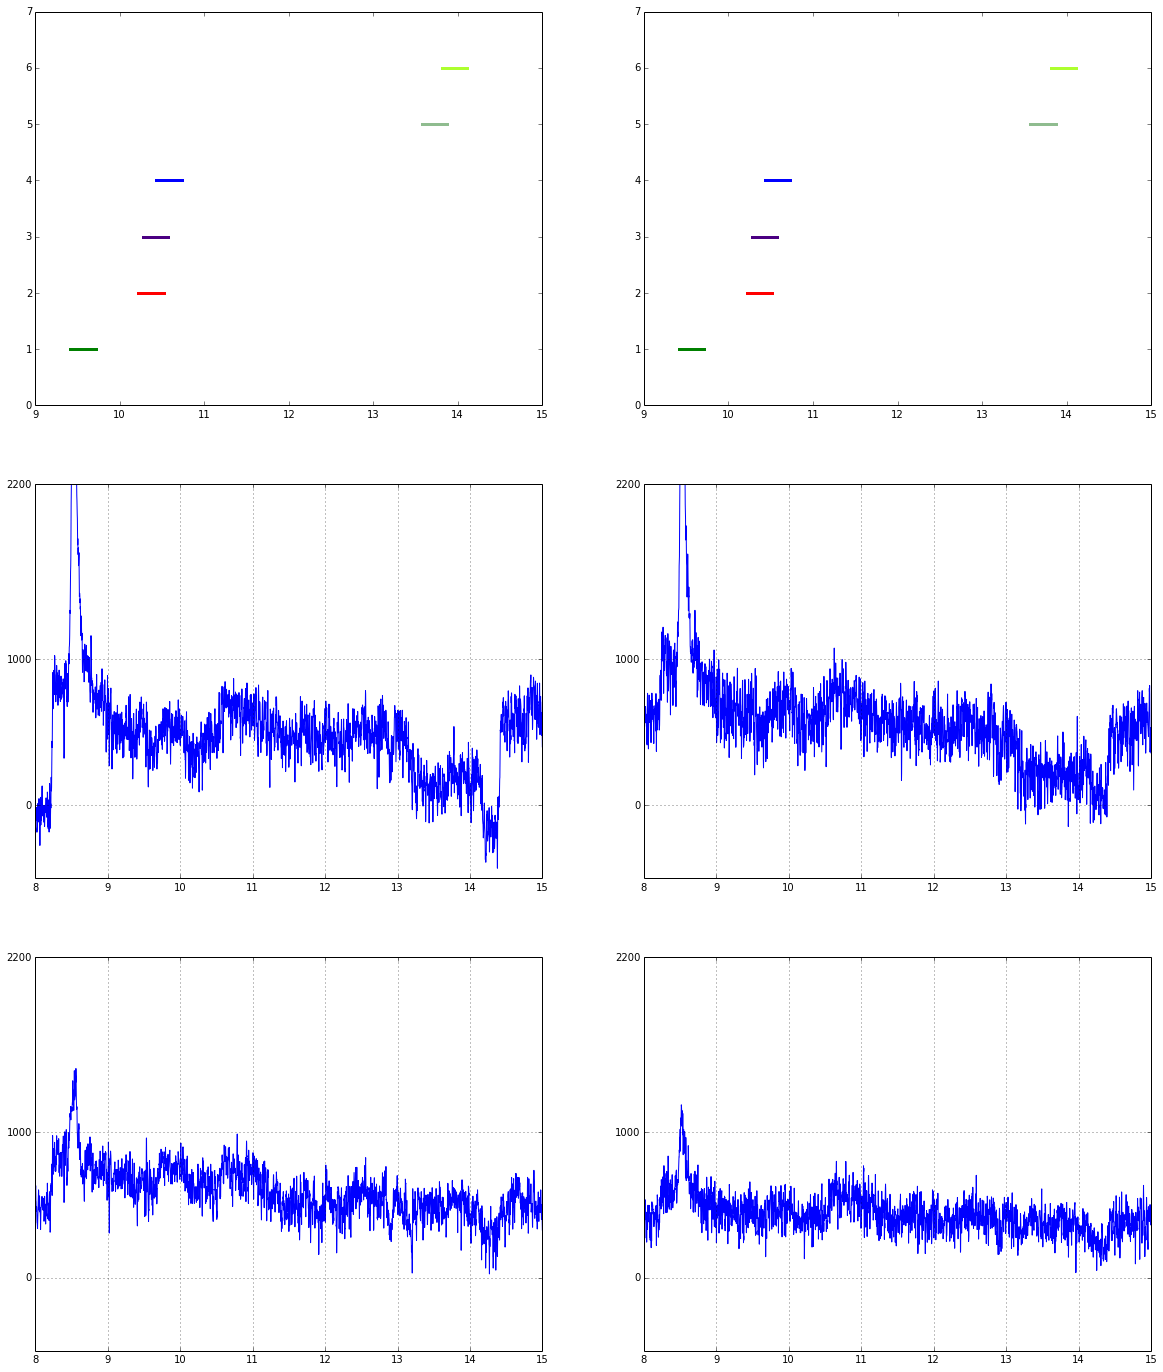

In [13]:
plotChans(s1s1[:4000])            
plotChans(s1s1[4000:7500])


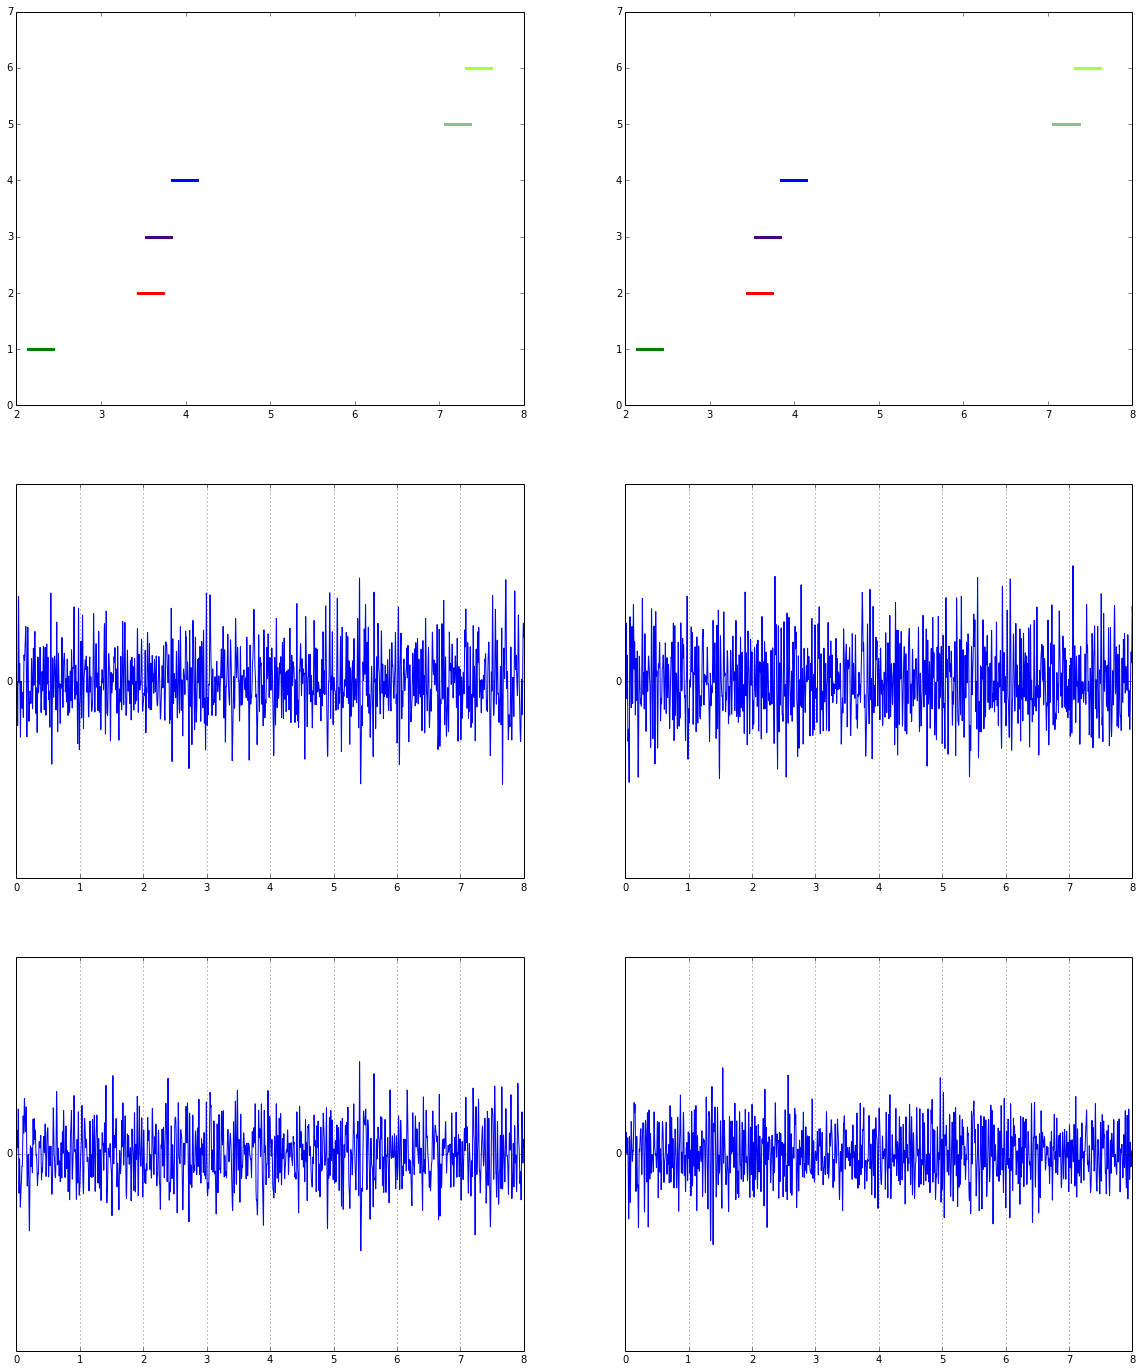

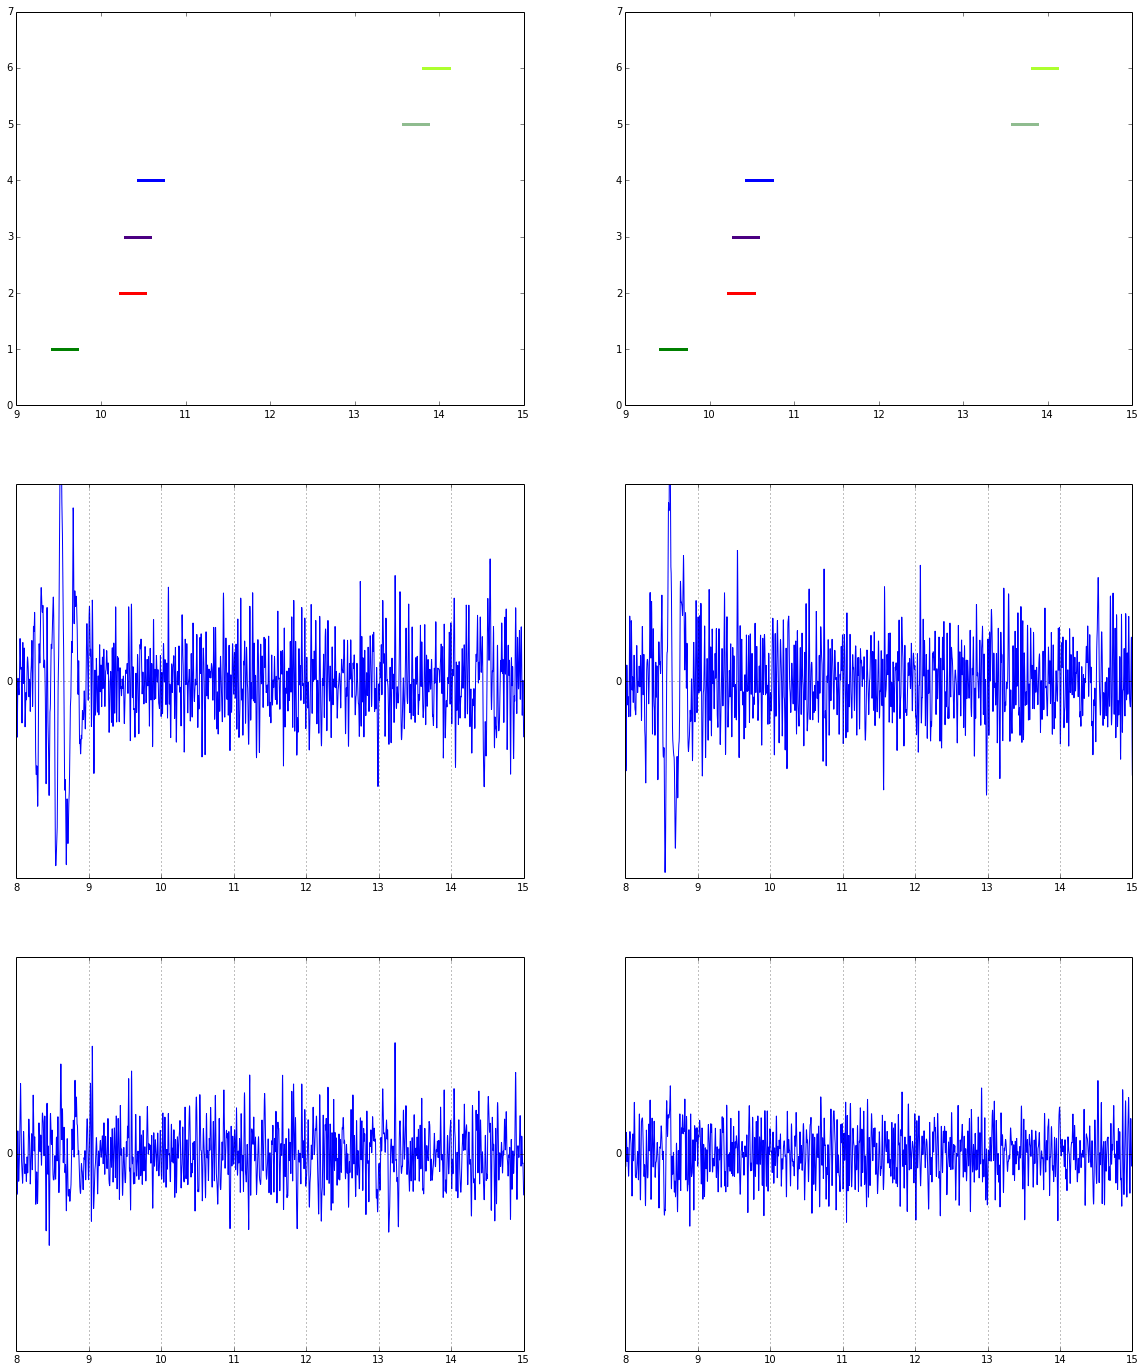

In [77]:
plotChans(s1s1f[:4000],ylim=[-500,500])
plotChans(s1s1f[4000:7500],ylim=[-500,500])

In [47]:
channels

Index(['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10'], dtype='object')

(129,) (129,)


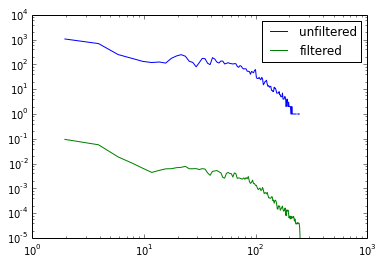

In [75]:
psd1 = welch(s1s1['Fp2'][:4000],fs=500)
psd2 = welch(s1s1f['Fp2'][:4000],fs=500)
pl.loglog(psd1[0],psd1[1],label="unfiltered")
pl.loglog(psd2[0],psd2[1],label="filtered")
pl.legend()
print(psd1[1].shape,psd2[1].shape)

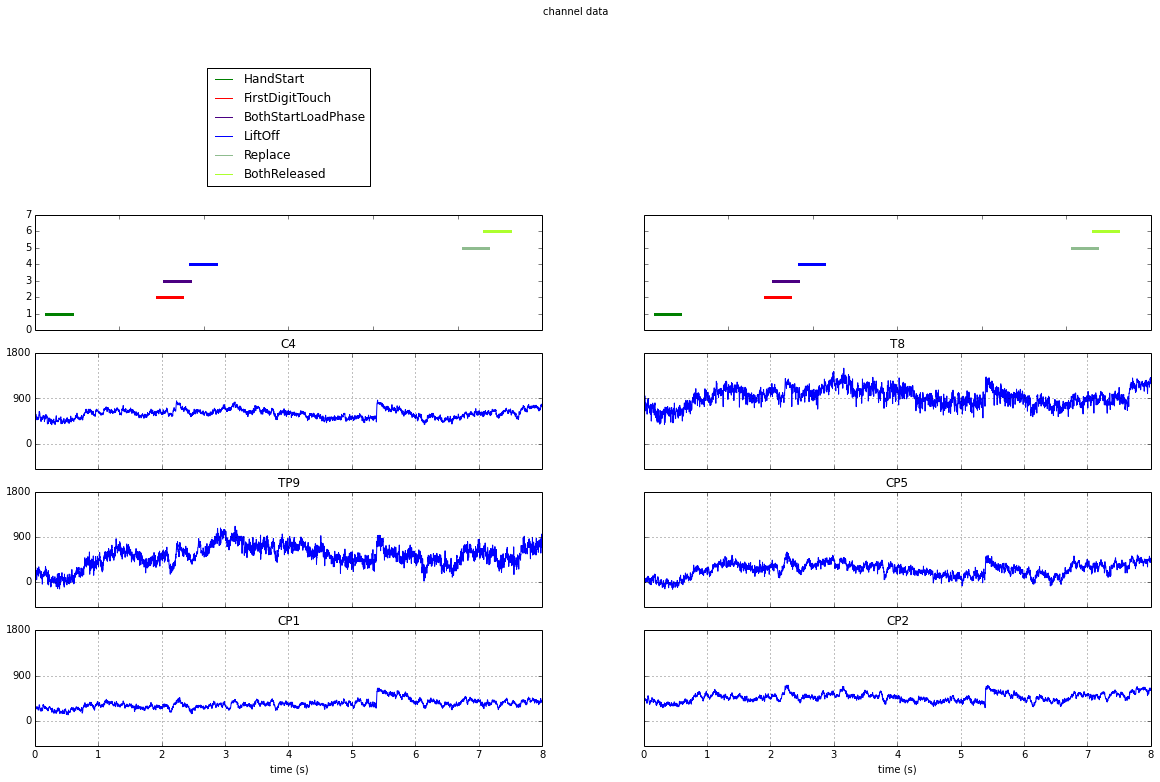

In [208]:


fig1, axes1 = pl.subplots(nrows = 5,ncols=2)
fig1.suptitle("channel data")
for i, ch in enumerate(channels[14:20]):
    sample_s1s1.plot(x="time",y=ch,ax=axes1[i//2 + 2][i%2],legend=False,figsize=(20,12))
    axes1[i//2 + 2][i%2].set_title(ch)
    axes1[i//2 + 2][i%2].set_xlabel("")
    axes1[i//2 + 2][i%2].set_yticks([0,900,1800])
    axes1[i//2 + 2][i%2].set_ylim([-500,1800])
    

lines = []
for i, ev in enumerate(events):
    times = sample_s1s1["time"][sample_s1s1[ev]==1]
    ys = np.full(len(times),i+1)
    for j in range(2):
        axes1[1][j].set_ylim(0,7) 
        axes1[1][j].plot(times,ys,color=event_colours[ev],linewidth=3,label=ev)
    axes1[0][0].plot([0],[0],color=event_colours[ev],label=ev)
    axes1[0][0].legend(loc = "lower center")

pl.setp([a.get_xticklabels() for a in axes1.flatten()[0:8]], visible=False)
pl.setp([a.get_yticklabels() for a in axes1[:, 1]], visible=False)    
    
for j in range(2):
    axes1[0][j].axis('off')
    axes1[0][j].set_xticks([])
    axes1[0][j].set_yticks([])
    axes1[4,j].set_xlabel("time (s)")
    
pl.savefig(image_path + "s1s1_6chan.png")

In [ ]:
fig2, axes2 = pl.subplots(nrows=len(channels)//2, ncols=2)
fig2.suptitle(event)
for i, ch in enumerate(channels):
    sample_s1s1.plot(kind="scatter", x="time", y=ch, edgecolors='none', ax=axes2[i//2][i%2], figsize=(20,20), c=sample_s1s1[event].apply(EventColors.__getitem__))
    axes[i//2][i%2].set_xlabel("")
    axes[i//2][i%2].set_yticks([0,1000,2000,3000])